In [17]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [27]:
# reading the dataset
url="https://raw.githubusercontent.com/ryanschaub/Level-Difficulty-in-Candy-Crush-Saga/master/candy_crush.csv"
urlretrieve(url,"candy_saga.csv")
candy=pd.read_csv("candy_saga.csv")
candy['date']=pd.to_datetime(candy['dt'])
candy.head()

,player_id,dt,level,num_attempts,num_success,date
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1,2014-01-04
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1,2014-01-01
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0,2014-01-05
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1,2014-01-03
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0,2014-01-07


In [28]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 6 columns):
player_id       16865 non-null object
dt              16865 non-null object
level           16865 non-null int64
num_attempts    16865 non-null int64
num_success     16865 non-null int64
date            16865 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 790.7+ KB


In [29]:
candy.isna().sum()

player_id       0
dt              0
level           0
num_attempts    0
num_success     0
date            0
dtype: int64

In [32]:
candy.shape

(16865, 6)

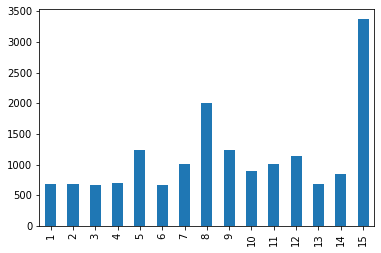

In [194]:
candy.level.value_counts().sort_index().plot(kind='bar')

In [38]:
len((candy.player_id).unique())          

6814

# Computing level difficulty

In [146]:
difficulty=candy.groupby(["level"],as_index=True).agg(attempts=('num_attempts',np.sum),wins=('num_success',np.sum))
difficulty['p_win']=difficulty.wins/difficulty.attempts
difficulty

,attempts,wins,p_win
level,,,
1,1322,818,0.618759
2,1285,666,0.518288
3,1546,662,0.428202
4,1893,705,0.372425
5,6937,634,0.091394
6,1591,668,0.419862
7,4526,614,0.135661
8,15816,641,0.040529
9,8241,670,0.081301


Text(0.5, 1.0, 'Level Difficulty')

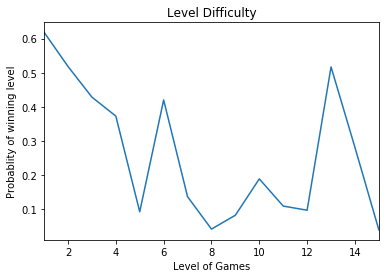

In [156]:
difficulty.p_win.plot(kind='line')
plt.xlabel("Level of Games")
plt.ylabel("Probablity of winning level")
plt.title("Level Difficulty")

In [150]:
difficulty['error']=np.sqrt(difficulty.p_win*(1-difficulty.p_win)/difficulty.attempts)
difficulty

,attempts,wins,p_win,error
level,,,,
1,1322,818,0.618759,0.013358
2,1285,666,0.518288,0.013939
3,1546,662,0.428202,0.012585
4,1893,705,0.372425,0.011112
5,6937,634,0.091394,0.003460
6,1591,668,0.419862,0.012373
7,4526,614,0.135661,0.005090
8,15816,641,0.040529,0.001568
9,8241,670,0.081301,0.003011


In [167]:
# The probability of completing the game without losing a single time
p=np.product(difficulty.p_win)
p

9.447140934486065e-12

level
1      78
2       9
3      14
4      30
5      80
6      55
7      73
8      95
9     112
10     69
11    258
12     46
13     18
14     34
15    138
Name: num_attempts, dtype: int64

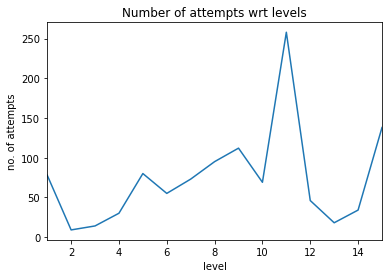

In [189]:
#max number of attempts wrt levels
candy.groupby('level')['num_attempts'].max().plot(kind='line')
plt.ylabel("no. of attempts")
plt.title("Number of attempts wrt levels")
candy.groupby('level')['num_attempts'].max()

level
1     55
2      8
3      8
4      6
5     13
6      8
7      6
8      6
9      7
10     9
11     5
12     7
13    13
14    20
15     6
Name: num_success, dtype: int64

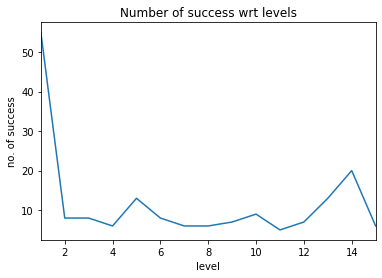

In [188]:
#max number of attempts wrt levels
candy.groupby('level')['num_success'].max().plot(kind='line')
plt.ylabel("no. of success")
plt.title("Number of success wrt levels")
candy.groupby('level')['num_success'].max()

In [181]:
candy.date.value_counts()

2014-01-03    2518
2014-01-07    2470
2014-01-05    2451
2014-01-06    2437
2014-01-02    2422
2014-01-04    2368
2014-01-01    2199
Name: date, dtype: int64

In [206]:
candy.groupby('level')['player_id'].apply(lambda x:len((x).unique())) 

level
1      676
2      680
3      673
4      705
5     1200
6      670
7      966
8     1839
9     1216
10     879
11     994
12    1111
13     687
14     844
15    2836
Name: player_id, dtype: int64

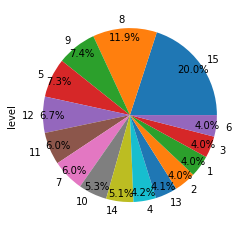

In [191]:
candy['level'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',pctdistance = 0.9)